<a href="https://colab.research.google.com/github/MrEwdew/DeepLearning25/blob/main/week_1/CIFAR10-ShallowLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: CIFAR10 Challenge

**CIFAR10** (http://www.cs.toronto.edu/~kriz/cifar.html) is one of the most famous ML data sets.

## Data
* 32x32 color images
* in 10 classes
* 50k training images
* 10k test images



<img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=700>

In [2]:
#get data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#traindata: 50k 32X32 rgb images
X_train.shape

(50000, 32, 32, 3)

In [4]:
#labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

## Task: build the best classifier (with feature extration) using the methods you know from ML1+2
* work in small teams (2-4)
* use NumPy pre-processing, feature extraction and hyer-parameter tuning in Scikit-Learn
* no Neural Networks!
* best test F1-Score winns!

In [6]:
from sklearn.feature_extraction import DictVectorizer

In [11]:
vec = DictVectorizer()

(50000, 32, 2, 3)

In [12]:

im_R = X_train.copy()
im_R[:,:, :, (1, 2)] = 0
im_G = X_train.copy()
im_G[:,:, :, (0, 2)] = 0
im_B = X_train.copy()
im_B[:,:, :, (0, 1)] = 0

array([[[ 59,   0,   0],
        [ 43,   0,   0],
        [ 50,   0,   0],
        ...,
        [158,   0,   0],
        [152,   0,   0],
        [148,   0,   0]],

       [[ 16,   0,   0],
        [  0,   0,   0],
        [ 18,   0,   0],
        ...,
        [123,   0,   0],
        [119,   0,   0],
        [122,   0,   0]],

       [[ 25,   0,   0],
        [ 16,   0,   0],
        [ 49,   0,   0],
        ...,
        [118,   0,   0],
        [120,   0,   0],
        [109,   0,   0]],

       ...,

       [[208,   0,   0],
        [201,   0,   0],
        [198,   0,   0],
        ...,
        [160,   0,   0],
        [ 56,   0,   0],
        [ 53,   0,   0]],

       [[180,   0,   0],
        [173,   0,   0],
        [186,   0,   0],
        ...,
        [184,   0,   0],
        [ 97,   0,   0],
        [ 83,   0,   0]],

       [[177,   0,   0],
        [168,   0,   0],
        [179,   0,   0],
        ...,
        [216,   0,   0],
        [151,   0,   0],
        [123,   0,   0]]], dtype=uint8)
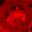

In [17]:
im_R[0]

array([[[  0,  62,   0],
        [  0,  46,   0],
        [  0,  48,   0],
        ...,
        [  0, 132,   0],
        [  0, 125,   0],
        [  0, 124,   0]],

       [[  0,  20,   0],
        [  0,   0,   0],
        [  0,   8,   0],
        ...,
        [  0,  88,   0],
        [  0,  83,   0],
        [  0,  87,   0]],

       [[  0,  24,   0],
        [  0,   7,   0],
        [  0,  27,   0],
        ...,
        [  0,  84,   0],
        [  0,  84,   0],
        [  0,  73,   0]],

       ...,

       [[  0, 170,   0],
        [  0, 153,   0],
        [  0, 161,   0],
        ...,
        [  0, 133,   0],
        [  0,  31,   0],
        [  0,  34,   0]],

       [[  0, 139,   0],
        [  0, 123,   0],
        [  0, 144,   0],
        ...,
        [  0, 148,   0],
        [  0,  62,   0],
        [  0,  53,   0]],

       [[  0, 144,   0],
        [  0, 129,   0],
        [  0, 142,   0],
        ...,
        [  0, 184,   0],
        [  0, 118,   0],
        [  0,  92,   0]]], dtype=uint8)
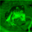

In [18]:
im_G[0]

array([[[  0,   0,  63],
        [  0,   0,  45],
        [  0,   0,  43],
        ...,
        [  0,   0, 108],
        [  0,   0, 102],
        [  0,   0, 103]],

       [[  0,   0,  20],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  55],
        [  0,   0,  50],
        [  0,   0,  57]],

       [[  0,   0,  21],
        [  0,   0,   0],
        [  0,   0,   8],
        ...,
        [  0,   0,  50],
        [  0,   0,  50],
        [  0,   0,  42]],

       ...,

       [[  0,   0,  96],
        [  0,   0,  34],
        [  0,   0,  26],
        ...,
        [  0,   0,  70],
        [  0,   0,   7],
        [  0,   0,  20]],

       [[  0,   0,  96],
        [  0,   0,  42],
        [  0,   0,  30],
        ...,
        [  0,   0,  94],
        [  0,   0,  34],
        [  0,   0,  34]],

       [[  0,   0, 116],
        [  0,   0,  94],
        [  0,   0,  87],
        ...,
        [  0,   0, 140],
        [  0,   0,  84],
        [  0,   0,  72]]], dtype=uint8)
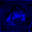

In [19]:
im_B[0]